In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
pointsNames = ['A', 'B', 'C', 'D', 'E', 'F']

points = np.array([[2, 0], [0.8, 0.8],[0.8, -0.4], [0.8, -1.2], [-0.8, -0.8], [-0.8, -1.2]]) #m
points = points.T

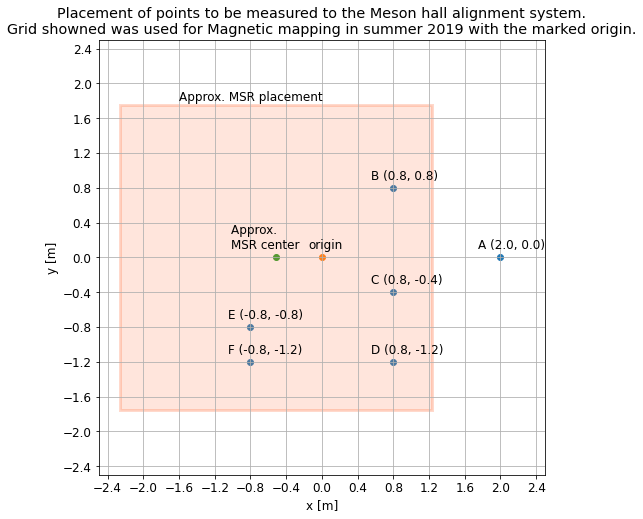

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.25
txtshy = 0.1
plt.rcParams.update({'font.size': 12})


plt.scatter(points[0], points[1])
for i, txt in enumerate(pointsNames):
    ax.annotate(txt + f" ({points[0][i]}, {points[1][i]})", \
                (points[0][i], points[1][i]), xytext=(points[0][i]+txtshx, points[1][i]+txtshy))
    
ax.scatter(0,0)
ax.annotate('origin', (0+txtshx+0.1, 0+txtshy))

MSR_shift = -51.67/100 #m
ax.scatter(MSR_shift,0)
ax.annotate('Approx. \nMSR center', (MSR_shift+txtshx-0.25, 0+txtshy))

# Create a Rectangle patch
rect = patches.Rectangle((-3.5/2+MSR_shift, -3.5/2), 3.5, 3.5, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2)
# print(-3.5/2+MSR_shift, -3.5/2)
ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Placement of points to be measured to the Meson hall alignment system."+ 
                 "\nGrid showned was used for Magnetic mapping in summer 2019 with the marked origin.")

axis_range = np.arange(0, 6, .4) - 2.4
ax.set_xticks(axis_range)
ax.set_yticks(axis_range)

ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")

plt.grid()
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
plt.show()

## Measurements by Tony Hessels

In [104]:
points_Cycl_center = np.array([
    [37046.4923, 2927.4070, -1357.7947],
    [35864.9741, 3711.6719, -1359.5031],
    [35852.4358, 2510.7481, -1362.1989],
    [35854.1315, 1709.6072, -1370.5891],
    [34244.4654, 2087.2935, -1366.3366],
    [34246.1064, 1687.7073, -1370.2622] #flipped E and F compared to how Tony marked them to follow ours
    ]) #mm [x,y,z]

points_Cycl_center = points_Cycl_center.T
MSR_CENTER = np.array([34527.4688, 2890.5609, -1362.6374]) #mm [x,y,z]


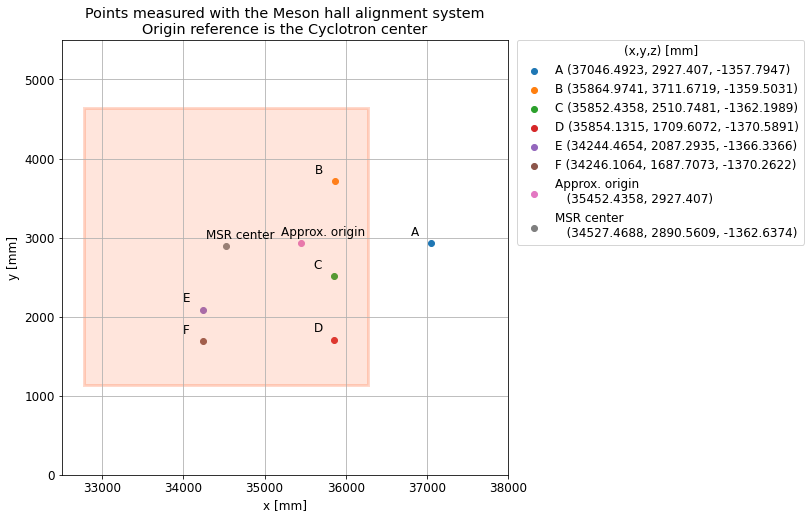

In [194]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.25*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

# plt.scatter(points_Cycl_center[0], points_Cycl_center[1])
for i, txt in enumerate(pointsNames):
    plt.scatter(points_Cycl_center[0][i], points_Cycl_center[1][i],# color='blue', 
        label=txt+ f" ({points_Cycl_center[0][i]}, {points_Cycl_center[1][i]}, {points_Cycl_center[2][i]})")
    ax.annotate(txt, # f" ({points_Cycl_center[0][i]:.3}, {points_Cycl_center[1][i]:.3})", \
                (points_Cycl_center[0][i], points_Cycl_center[1][i]), 
                xytext=(points_Cycl_center[0][i]+txtshx, points_Cycl_center[1][i]+txtshy))
    
#x is C-40 cm, same y as A
orgin_approx = [points_Cycl_center[0][2]-400, points_Cycl_center[1][0], 0]
ax.scatter(orgin_approx[0], orgin_approx[1], 
           label=f"Approx. origin\n   ({orgin_approx[0]}, {orgin_approx[1]})")

ax.annotate(f'Approx. origin', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
            (orgin_approx[0]+txtshx-0.25, orgin_approx[1]+txtshy))

# MSR_shift = -51.67/100 #m
ax.scatter(MSR_CENTER[0],MSR_CENTER[1], label=f"MSR center\n   ({MSR_CENTER[0]}, {MSR_CENTER[1]}, {MSR_CENTER[2]})")

ax.annotate(f'MSR center', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
            (MSR_CENTER[0]+txtshx-0.25, MSR_CENTER[1]+txtshy))

# Create a Rectangle patch
sideLength = 3.5*1000 #mm
rect = patches.Rectangle((-sideLength/2+MSR_CENTER[0], -sideLength/2+MSR_CENTER[1]), 
            sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2)
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
ax.add_patch(rect)
ax.set_title("Points measured with the Meson hall alignment system"+
             "\nOrigin reference is the Cyclotron center")

xlim = [32500, 38000]
ylim = [0, 5500]
axis_rangex = np.arange(xlim[0], xlim[1], 400)
axis_rangey = np.arange(ylim[0], ylim[1], 400)
# ax.set_xticks(axis_rangex)
# ax.set_yticks(axis_rangey)

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")

plt.grid()
# print(38000 - 32500)
# print(4800 - 0)
#setting limits to get a square grid
ax.set_xlim(xlim[0], xlim[1])
ax.set_ylim(ylim[0], ylim[1])
plt.show()

In [155]:
vec_flat1 = np.array([1,0,0])
vec_flat2 = np.array([0,1,0])

VecF_E = points_Cycl_center[:,4] - points_Cycl_center[:,5]
VecF_D = points_Cycl_center[:, 3] - points_Cycl_center[:,5]

VecCent_A = -MSR_CENTER + points_Cycl_center[:,0]
VecC_B = -points_Cycl_center[:, 2] + points_Cycl_center[:,1]

[35854.1315 34244.4654]


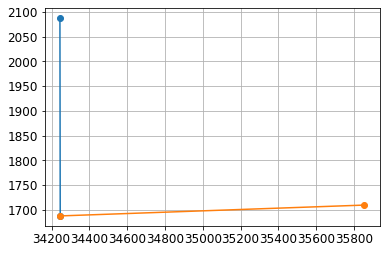

In [167]:
print(points_Cycl_center[0, 3:5])
plt.plot(points_Cycl_center[0, [4, 5]], points_Cycl_center[1, [4, 5]], ls='-', marker="o")

plt.plot(points_Cycl_center[0, [3, 5]], points_Cycl_center[1, [3, 5]], ls='-', marker="o")
plt.grid()
plt.show()

In [157]:
def GetAngle(vector_1, vector_2):
    "Returns angle in degrees between two vectors"

    unit_vector_1 = vector_1 / np.linalg. norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg. norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    
    return np.rad2deg(angle)

In [158]:
#the angle between x and y axis of F_T - ideally should be 90 degrees
print(GetAngle(VecF_E[:2], VecF_D[:2]))
#another check for the same thing using different points
print(GetAngle(VecCent_A[:2], VecC_B[:2]))

#the angle between F_T x and F_M x - ideally should be 0
print(GetAngle(VecF_D[:2], vec_flat1[:2]))
print(GetAngle(VecCent_A[:2], vec_flat1[:2]))

#the angle between F_T y and F_M y - ideally should be 0
print(GetAngle(VecF_E[:2], vec_flat2[:2]))
print(GetAngle(VecC_B[:2], vec_flat2[:2]))

89.45502770212198
88.563809108142
0.7802703277190584
0.8380134128075705
0.23529802984151413
0.598177479050642


There is less than a 1 degree difference between the alignment between the grid that Takashi made and the meson hall alignment grid, which is pretty good.

## Trying to match up our two coord systems

$T_k$: Takashi's grid

$T_M$: the Meson hall grid alligment system

In [205]:
# fig, ax1 = plt.subplots()
# t = np.arange(0.01, 10.0, 0.01)
# s1 = np.exp(t)
# ax1.plot(t, s1, 'b-')
# ax1.set_xlabel('time (s)')
# # Make the y-axis label, ticks and tick labels match the line color.
# ax1.set_ylabel('exp', color='b')
# ax1.tick_params('y', colors='b')

# ax2 = ax1.twinx()
# s2 = np.sin(2 * np.pi * t)
# ax2.plot(t, s2, 'r.')
# ax2.set_ylabel('sin', color='r')
# ax2.tick_params('y', colors='r')

# fig.tight_layout()
# plt.show()


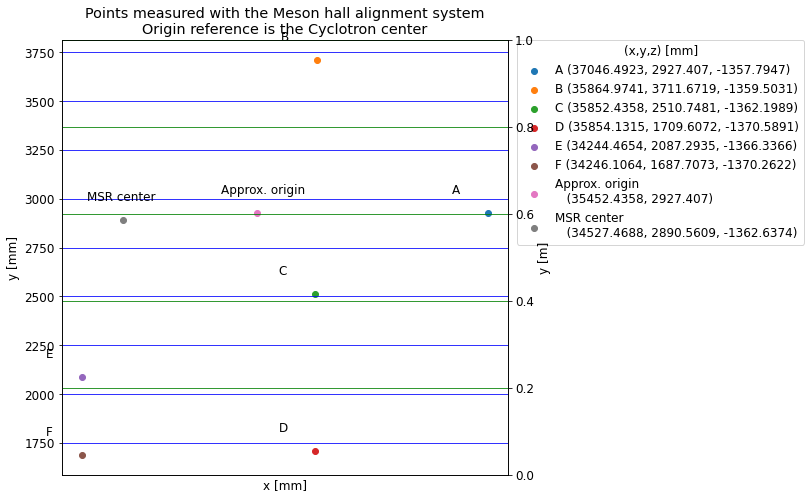

In [204]:
fig, ax = plt.subplots(figsize=(8,8))
txtshx = -0.25*1000
txtshy = 0.1*1000
plt.rcParams.update({'font.size': 12})

# plt.scatter(points_Cycl_center[0], points_Cycl_center[1])
for i, txt in enumerate(pointsNames):
    plt.scatter(points_Cycl_center[0][i], points_Cycl_center[1][i],# color='blue', 
        label=txt+ f" ({points_Cycl_center[0][i]}, {points_Cycl_center[1][i]}, {points_Cycl_center[2][i]})")
    ax.annotate(txt, # f" ({points_Cycl_center[0][i]:.3}, {points_Cycl_center[1][i]:.3})", \
                (points_Cycl_center[0][i], points_Cycl_center[1][i]), 
                xytext=(points_Cycl_center[0][i]+txtshx, points_Cycl_center[1][i]+txtshy))
    
#x is C-40 cm, same y as A
orgin_approx = [points_Cycl_center[0][2]-400, points_Cycl_center[1][0], 0]
ax.scatter(orgin_approx[0], orgin_approx[1], 
           label=f"Approx. origin\n   ({orgin_approx[0]}, {orgin_approx[1]})")

ax.annotate(f'Approx. origin', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
            (orgin_approx[0]+txtshx-0.25, orgin_approx[1]+txtshy))

# MSR_shift = -51.67/100 #m
ax.scatter(MSR_CENTER[0],MSR_CENTER[1], label=f"MSR center\n   ({MSR_CENTER[0]}, {MSR_CENTER[1]}, {MSR_CENTER[2]})")

ax.annotate(f'MSR center', # \n({MSR_CENTER[0]:.4},{MSR_CENTER[1]:.4})', 
            (MSR_CENTER[0]+txtshx-0.25, MSR_CENTER[1]+txtshy))

# Create a Rectangle patch
# sideLength = 3.5*1000 #mm
# rect = patches.Rectangle((-sideLength/2+MSR_CENTER[0], -sideLength/2+MSR_CENTER[1]), 
#             sideLength, sideLength, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2)
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
# ax.add_patch(rect)
ax.set_title("Points measured with the Meson hall alignment system"+
             "\nOrigin reference is the Cyclotron center")

xlim = [32500, 38000]
ylim = [0, 5500]
axis_rangex = np.arange(xlim[0], xlim[1], 400)
axis_rangey = np.arange(ylim[0], ylim[1], 400)
# ax.set_xticks(axis_rangex)
# ax.set_yticks(axis_rangey)

plt.legend(title="(x,y,z) [mm]", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
plt.grid(color='blue')

# print(38000 - 32500)
# print(4800 - 0)
#setting limits to get a square grid
# ax.set_xlim(xlim[0], xlim[1])
# ax.set_ylim(ylim[0], ylim[1])

ax2 = ax.twinx()
txtshx = -0.25
txtshy = 0.1

# plt.scatter(points[0], points[1])
# for i, txt in enumerate(pointsNames):
#     ax2.annotate(txt + f" ({points[0][i]}, {points[1][i]})", \
#                 (points[0][i], points[1][i]), xytext=(points[0][i]+txtshx, points[1][i]+txtshy))
    
# ax2.scatter(0,0)
# ax2.annotate('origin', (0+txtshx+0.1, 0+txtshy))

# MSR_shift = -51.67/100 #m
# ax2.scatter(MSR_shift,0)
# ax.annotate('Approx. \nMSR center', (MSR_shift+txtshx-0.25, 0+txtshy))

# Create a Rectangle patch
# rect = patches.Rectangle((-3.5/2+MSR_shift, -3.5/2), 3.5, 3.5, linewidth=3, edgecolor='orangered', facecolor='coral', alpha=0.2)
# print(-3.5/2+MSR_shift, -3.5/2)
# ax.annotate('Approx. MSR placement', (-1.6, 1.8))

# Add the patch to the Axes
# ax.add_patch(rect)

axis_range = np.arange(0, 6, .4) - 2.4
ax2.set_xticks(axis_range)
ax2.set_xlabel("x [m]")
ax2.set_ylabel("y [m]")

# ax3 = ax.twiny()
# ax3.set_yticks(axis_range)
# ax3.set_ylabel("y [m]")

# ax2.set_xlim(-2.5, 2.5)
# ax2.set_ylim(-2.5, 2.5)

plt.grid(color='green')
# fig.tight_layout()
plt.show()